In [3]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

In [12]:
# Primal-Dual Segmentation

T = 200
sigma = 1.0
tau   = 0.025
alpha = 1
theta = 1.0

im = skimage.io.imread('withWholeEasier.pgm')[:,:] #/ 255.
u = im
p = np.random.randn(im.shape[0], im.shape[1], 2) * 0.0

u_tilde = np.zeros_like(im)

results = [im]

constant = (im-0)**2 - (im-1)**2

for i in range(T):
    dy, dx = np.gradient(u_tilde)
    grad = np.stack([dy, dx], axis=-1)

    gradient_step = p + sigma * grad
    denominator = np.maximum(1.0, np.linalg.norm(gradient_step, axis=2) / alpha)

    nextp = gradient_step / np.stack([denominator, denominator], axis=-1)

    
    divpy, _ = np.gradient(nextp[:,:,0])
    _, divpx = np.gradient(nextp[:,:,1])
    
    nextu = u - tau*(constant - (divpy+divpx))
    
    nextu_tilde = nextu + theta*(nextu - u)
   
    u = nextu
    p = nextp
    u_tilde = nextu_tilde
    
    results += [u]


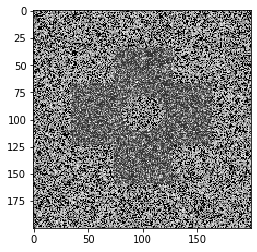

In [13]:
for i, r in enumerate(results):
    if (i%10==0 or True):
        plt.imshow(r, 'gray')
        plt.imsave(str(i)+'seg.png', r, cmap='gray')